# **Sensitivity of Bond Prices**

In [1]:
from datetime import datetime
from datetime import timedelta
import scipy.optimize as optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Price of a bond
def pric_bond(fv, coupon, ytm, maturity, freq=1):
  """
  fv: Face value ($)
  coupon: Coupon rate (%)
  ytm: Yield to maturity (%)
  maturity: Time to maturity (years)
  freq: Frequency of payments

  Returns: price
  """
  ytm = ytm/100
  freq = float(freq)
  periods = maturity*freq
  coupon = (coupon/100)*fv/freq
  dt = [(i+1)/freq for i in range(int(periods))]
  price = sum([coupon/(1+ytm/freq)**(freq*t) for t in dt]) + fv/(1+ytm/freq)**(freq*maturity)
  
  return round(price,2)


# Duration of a bond
def dura_bond (fv, coupon, ytm, maturity, freq=1):
  """
  fv: Face value ($)
  coupon: Coupon rate (%)
  ytm: Yield to maturity (%)
  maturity: Time to maturity (years)
  freq: Frequency of payments

  Returns: duration in frequency
  """
  table = []
  for i in range(1, (maturity*freq + 1)):
    
    cf = (fv * coupon/100)/freq
    
    if i == maturity*freq:
      cf = cf + fv
    
    pv = cf / (1 + ((ytm/100)/freq))**i

    table.append([i, pv])

  columns = ['t', 'PV']
  df = pd.DataFrame(table, columns = columns)
  df['W'] = df['PV'] / df['PV'].sum()
  df['t*W'] = df['t'] * df['W']

  ds = df['t*W'].sum()

  return ds


# Convexity of a bond
def conv_bond (fv, coupon, ytm, maturity, freq=1):
  """
  fv: Face value ($)
  coupon: Coupon rate (%)
  ytm: Yield to maturity (%)
  maturity: Time to maturity (years)
  freq: Frequency of payments

  Returns: convexity in frequency
  """
  table = []
  for i in range(1, (maturity*freq + 1)):
    
    cf = (fv * coupon/100)/freq
    
    if i == maturity*freq:
      cf = cf + fv
    
    pv = cf / (1 + ((ytm/100)/freq))**i

    table.append([i, pv])

  columns = ['t', 'PV']
  df = pd.DataFrame(table, columns = columns)
  df['W'] = df['PV'] / df['PV'].sum()
  df['t*W'] = df['t'] * df['W']
  df['C'] = df['PV'] * df['t'] * (1 + df['t'])

  c = df['C'].sum() / (df['PV'].sum() * (1 + (ytm/100)/freq)**2)

  return c


# price, duration and convexity of a bond
def pdc_bond (fv, coupon, ytm, maturity, freq=1):
  """
  fv: Face value ($)
  coupon: Coupon rate (%)
  ytm: Yield to maturity (%)
  maturity: Time to maturity (years)
  freq: Frequency of payments

  Returns: [price, duration in frequency, convexity in frequency]
  """
  table = []
  for i in range(1, (maturity*freq + 1)):
    
    cf = (fv * coupon/100)/freq
    
    if i == maturity*freq:
      cf = cf + fv
    
    pv = cf / (1 + ((ytm/100)/freq))**i

    table.append([i, pv])

  columns = ['t', 'PV']
  df = pd.DataFrame(table, columns = columns)
  df['W'] = df['PV'] / df['PV'].sum()
  df['t*W'] = df['t'] * df['W']
  df['C'] = df['PV'] * df['t'] * (1 + df['t'])

  p = df['PV'].sum()
  ds = df['t*W'].sum()
  c = df['C'].sum() / (p * (1 + (ytm/100)/freq)**2)

  return [p, ds, c]


# Duration of assets
def dura_assets(val, dur):
  """
  val: List with the values of assets (+) and liabilities (-)
  dur: List with the durations of assets and liabilities

  Returns: [equity, duration of assets]
  """
  value = sum(val)
  duration = 0
  for v in range(len(val)):
    duration += dur[v] * val[v]/value
  return [value, duration]

### Consider a 30-year bond with 5% coupon rate and semiannual coupon payment. How is the price affected by a change in the YTM?

* Settlement Date: 2016-01-01
*  Maturity Date: 2046-01-01
*  Coupon Rate (%): 5
*  Frequency (per year): 2

    YTM%   Price
0    0.5  225.22
1    1.0  203.45
2    1.5  184.30
3    2.0  167.43
4    2.5  152.54
5    3.0  139.38
6    3.5  127.72
7    4.0  117.38
8    4.5  108.19
9    5.0  100.00
10   5.5   92.69
11   6.0   86.16
12   6.5   80.31
13   7.0   75.06
14   7.5   70.33
15   8.0   66.06
16   8.5   62.21
17   9.0   58.72
18   9.5   55.56
19  10.0   52.68


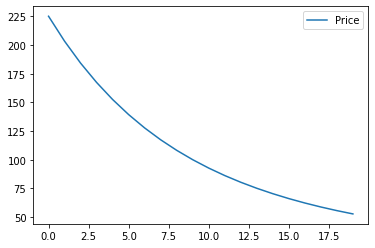

In [3]:
# pric_bond(fv, coupon, ytm, maturity, freq=1)

ytm = 0.5
data = []
while ytm <= 10:
  data.append([ytm, pric_bond(100, 5, ytm, 30, 2)])
  ytm += 0.5

columns = ['YTM%','Price']
df = pd.DataFrame(data, columns = columns)
print(df)
df.plot(y=['Price'])
plt.show()

### What is the duration of a 5-year bond with a 5% coupon, semi-annually paid? The YTM is 3%.

In [4]:
# dura_bond (fv, coupon, ytm, maturity, freq)
freq = 2
ds = dura_bond (100, 5, 3, 5, freq)
dy = ds/freq

print(f'Duration (semesters): {round(ds, 2)}')
print(f'Duration (years): {round(dy, 2)}')

Duration (semesters): 9.02
Duration (years): 4.51


### Duration for alternative bonds if:

*  Coupon Rate = 1%
*  Coupon Rate = 0%
*  Maturity = 30 years
*  YTM = 1%

In [44]:
# dura_bond (fv, coupon, ytm, maturity, freq)
print('Coupon Rate = 1%')
ds = dura_bond (100, 1, 3, 5, 2)
dy = ds/freq
print(f'Duration (years): {round(dy, 2)}')


Coupon Rate = 1%
Duration (years): 4.88


In [6]:
# dura_bond (fv, coupon, ytm, maturity, freq)
print('Coupon Rate = 0%')
ds = dura_bond (100, 0, 3, 5, 2)
dy = ds/freq
print(f'Duration (years): {round(dy, 2)}')

Coupon Rate = 0%
Duration (years): 5.0


In [7]:
print('Maturity = 30 years')
ds = dura_bond (100, 5, 3, 30, 2)
dy = ds/freq
print(f'Duration (years): {round(dy, 2)}')

Maturity = 30 years
Duration (years): 18.02


In [8]:
print('YTM = 1%')
ds = dura_bond (100, 5, 1, 5, 2)
dy = ds/freq
print(f'Duration (years): {round(dy, 2)}')

YTM = 1%
Duration (years): 4.54


### What is the new price of this bond when the YTM increases by 100 bps?

In [9]:
# pric_bond(fv, coupon, ytm, maturity, freq=1)
price = pric_bond(100, 5, 4, 5, 2)
print(f'New price: ${round(price, 2)}')

New price: $104.49


### Is the price of the bond with lower coupon rates more sensitive to YTM changes?

*  Maturity: 30 years
*  Frequency (per year): 2

Higher Coupon Rate: 5 %

Lower Coupon Rate: 0 %

    YTM%  Higher  Lower
0    0.5  225.22  86.09
1    1.0  203.45  74.14
2    1.5  184.30  63.87
3    2.0  167.43  55.04
4    2.5  152.54  47.46
5    3.0  139.38  40.93
6    3.5  127.72  35.31
7    4.0  117.38  30.48
8    4.5  108.19  26.31
9    5.0  100.00  22.73
10   5.5   92.69  19.64
11   6.0   86.16  16.97
12   6.5   80.31  14.68
13   7.0   75.06  12.69
14   7.5   70.33  10.98
15   8.0   66.06   9.51
16   8.5   62.21   8.23
17   9.0   58.72   7.13
18   9.5   55.56   6.18
19  10.0   52.68   5.35


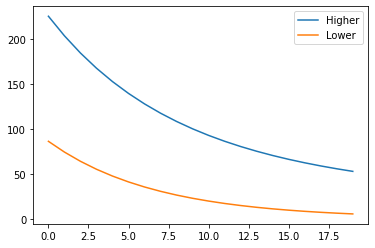

In [10]:
# pric_bond(fv, coupon, ytm, maturity, freq=1)
coupon = [5, 0]
ytm = 0.5
data = []
while ytm <= 10:
  high = pric_bond(100, coupon[0], ytm,  30, 2)
  low = pric_bond(100, coupon[1], ytm, 30, 2)
  data.append([ytm, high, low])
  ytm += 0.5

columns = ['YTM%','Higher', 'Lower']
df = pd.DataFrame(data, columns = columns)
print(df)
df.plot(y=['Higher', 'Lower'])
plt.show()

### Is the price of a long-term bond more sensitive to YTM changes?

*  Coupon Rate: 5 %
*  Frequency (per year): 2

Long-term maturity: 30 years

Short-term maturity: 3 years

    YTM%  Long-term  Short-term
0    0.5     225.22      113.38
1    1.0     203.45      111.79
2    1.5     184.30      110.23
3    2.0     167.43      108.69
4    2.5     152.54      107.18
5    3.0     139.38      105.70
6    3.5     127.72      104.24
7    4.0     117.38      102.80
8    4.5     108.19      101.39
9    5.0     100.00      100.00
10   5.5      92.69       98.63
11   6.0      86.16       97.29
12   6.5      80.31       95.97
13   7.0      75.06       94.67
14   7.5      70.33       93.39
15   8.0      66.06       92.14
16   8.5      62.21       90.90
17   9.0      58.72       89.68
18   9.5      55.56       88.49
19  10.0      52.68       87.31


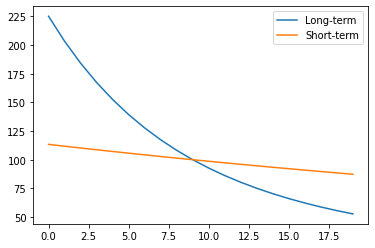

In [11]:
# pric_bond(fv, coupon, ytm, maturity, freq=1)
maturity = [30, 3]
ytm = 0.5

data = []
while ytm <= 10:
  long = pric_bond(100, 5, ytm, maturity[0], 2)
  short = pric_bond(100, 5, ytm, maturity[1], 2)
  data.append([ytm, long, short])
  ytm += 0.5

columns = ['YTM%','Long-term', 'Short-term']
df = pd.DataFrame(data, columns = columns)
print(df)
df.plot(y=['Long-term', 'Short-term'])
plt.show()

### Immunizing a hypothetical portfolio.

The assets of Firm XYZ consist of mortgages and other assets.

**Assets**

* Mortgages: 80.63 million USD (8.0 years)
* Others: 219.38 million USD (3.9 years)

**Liabilities**
* Others: 285 million USD (3.0 years)


In [37]:
# dura_assets(val, dur)
val = [80.63, 219.38, -285]
dur = [8, 3.9, 3]

equity = dura_assets(val, dur)
print(f'Duration: {round(equity[1], 2)} years')

Duration: 43.01 years


Immunization: Suppose we sell all the mortgages.

In [38]:
# dura_assets(val, dur)
val = [80.63, 219.38, -285]
dur = [0, 3.9, 3]

equity = dura_assets(val, dur)
print(f'Duration: {round(equity[1], 2)} years')

Duration: 0.04 years


### What is the price, duration and convexity of the following bond?

*  Settlement Date: 2016-01-01
*  Maturity Date: 2021-01-01
*  Coupon Rate (%): 5
*  YTM (%): 3
*  Face Value (USD): 100
*  Frequency (per year): 2

In [13]:
# pdc_bond (fv, coupon, ytm, maturity, freq=1)
db = pdc_bond (100, 5, 3, 5, 2)
print(f'Price: ${round(db[0], 2)}')
print(f'Duration (semesters): {round(db[1], 2)}')
print(f'Convexity (semesters): {round(db[2], 2)}')

Price: $109.22
Duration (semesters): 9.02
Convexity (semesters): 92.95


### What is the new price of this bond when the YTM increases by 1%?

In [14]:
# pdc_bond (fv, coupon, ytm, maturity, freq=1)
db1 = pdc_bond (100, 5, 4, 5, 2)
print(f'Price: ${round(db1[0], 2)}')
print(f'Duration (semesters): {round(db1[1], 2)}')
print(f'Convexity (semesters): {round(db1[2], 2)}')

Price: $104.49
Duration (semesters): 9.0
Convexity (semesters): 91.69


In [15]:
freq = 2
convexity_adjustment = 0.5 * db[2] * (0.01/freq)**2
print(f'Convexity adjustment: {round(100*convexity_adjustment, 2)}%')

Convexity adjustment: 0.12%




---



### 3) Consider a zero-coupon bond which delivers USD 100 after 30 periods. The current YTM per period is 10%. The current price of the bond is 5.731. 

    YTM%  Price
0    0.5  86.10
1    1.0  74.19
2    1.5  63.98
3    2.0  55.21
4    2.5  47.67
5    3.0  41.20
6    3.5  35.63
7    4.0  30.83
8    4.5  26.70
9    5.0  23.14
10   5.5  20.06
11   6.0  17.41
12   6.5  15.12
13   7.0  13.14
14   7.5  11.42
15   8.0   9.94
16   8.5   8.65
17   9.0   7.54
18   9.5   6.57
19  10.0   5.73
20  10.5   5.00
21  11.0   4.37
22  11.5   3.82
23  12.0   3.34
24  12.5   2.92
25  13.0   2.56
26  13.5   2.24
27  14.0   1.96
28  14.5   1.72
29  15.0   1.51


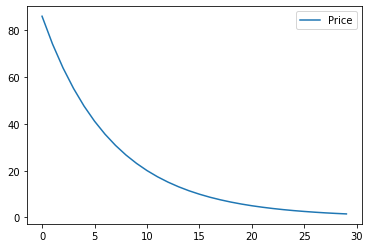

In [43]:
# pric_bond(fv, coupon, ytm, maturity, freq=1)
ytm = 0.5
data = []
while ytm <= 15:
  high = pric_bond(100, 0, ytm,  30, 1)
  data.append([ytm, high])
  ytm += 0.5

columns = ['YTM%','Price']
df = pd.DataFrame(data, columns = columns)
print(df)
df.plot(y=['Price'])
plt.show()

### 6) What is the duration of the following bond?

*  Face Value (USD): 100
*  Maturity (years): 5
*  Coupon Rate (%): 5
*  YTM (%): 5
*  Frequency (per year): 2

In [45]:
# dura_bond (fv, coupon, ytm, maturity, freq)
ds = dura_bond (100, 5, 5, 5, 2)
dy = ds/freq
print(f'Duration (years): {round(dy, 2)}')

Duration (years): 4.49


### 14) What is the price of the following bond?


*  Face Value (USD): 100
*  Maturity (years): 2
*  Coupon Rate (%): 4
*  YTM (%): 5
*  Frequency (per year): 2

In [46]:
# pdc_bond (fv, coupon, ytm, maturity, freq=1)
db = pdc_bond (100, 4, 5, 2, 2)
print(f'Price: ${round(db[0], 2)}')

Price: $98.12


### 15) What is the duration of the bond?

In [53]:
freq = 2
d1 = db[1] / freq
print(f'Duration: {round(d1, 2)} years')

Duration: 1.94 years


### 16) You are doing a stress test for Bank Uno. The only asset that Uno has is USD 250 million invested in the security that you analyzed in the previous two questions. If the YTM increases by 1,000 bps, by how much (approximately) do you expect Uno’s asset to shrink?

In [63]:
asset = 250
ytm = 5
ytm_change = 10
predicted_change = d1/(1 + (ytm/100))*(ytm_change/100)
asset_change = predicted_change * asset
print(f'Predicted change in assets: ${round(asset_change, 2)}')

Predicted change in assets: $46.22


### 21) Consider a bond which has a maturity of four years and pays a 3% coupon rate (with coupon payments once annually). The bond sells at par value of 100 USD. Calculate the bond’s convexity.

In [80]:
# pdc_bond (fv, coupon, ytm, maturity, freq=1)
db = pdc_bond (100, 3, 3, 4, 1)
print(f'Duration (semesters): {round(db[1], 2)}')
print(f'Convexity (semesters): {round(db[2], 2)}')

Price: $100.0
Duration (semesters): 3.83
Convexity (semesters): 17.78


## 22) If YTM increases by 200 bps, what will be the new price of the bond predicted by using both duration and convexity?

In [82]:
asset = 1
ytm = 3
ytm_change = 2
predicted_change = db[1]/(1 + (ytm/100))*(ytm_change/100)
convexity_adjustment = 0.5 * db[2] * (ytm_change/100)**2
new_price = db[0] * (1 + convexity_adjustment - predicted_change)
print(f'New price: ${round(new_price, 2)}')

New price: $92.92


### 24) Suppose an investor has constructed a portfolio Gamma consisting of 7,500 USD of Alpha and $5,000 of Epsilon. What is the duration of Gamma?

Maturity /	Duration /	Convexity

Alpha	2 /	1,9 /	0,05

Beta	5 /	4,1 /	0,25

Epsilon	10	/ 7,5 /	0,95

In [84]:
# dura_assets(val, dur)
val = [7500, 5000]
dur = [1.9, 7.5]
equity = dura_assets(val, dur)
print(f'Duration: {round(equity[1], 2)} years')

Duration: 4.14 years


### 26) What is the convexity measure of Gamma?

In [85]:
con = [0.05, 0.95]
c = (con[0]*val[0] + con[1]*val[1])/ sum(val)
print(f'Convexity of gamma: {round(c, 2)}')

Convexity of gamma: 0.41
